<a href="https://colab.research.google.com/github/KazGet/Laboratory-work/blob/main/Lab5_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
path1 = kagglehub.dataset_download("juniorbueno/rating-opencv-emotion-images")

print(path1)

100%|██████████| 53.9M/53.9M [00:03<00:00, 15.8MB/s]

Extracting files...


/root/.cache/kagglehub/datasets/juniorbueno/rating-opencv-emotion-images/versions/1


In [ ]:
cd /root

/root


In [ ]:
cp -r .cache/kagglehub/datasets/juniorbueno/rating-opencv-emotion-images/versions/1/Images/train/Disgust .cache/kagglehub/datasets/juniorbueno/rating-opencv-emotion-images/versions/1/Images

In [ ]:
mv .cache/kagglehub/datasets/juniorbueno/rating-opencv-emotion-images/versions/1/Images/Disgust .cache/kagglehub/datasets/juniorbueno/rating-opencv-emotion-images/versions/1/Images/disgust_for_aug_train

In [ ]:
cp -r .cache/kagglehub/datasets/juniorbueno/rating-opencv-emotion-images/versions/1/Images/validation/Disgust .cache/kagglehub/datasets/juniorbueno/rating-opencv-emotion-images/versions/1/Images

In [ ]:
mv .cache/kagglehub/datasets/juniorbueno/rating-opencv-emotion-images/versions/1/Images/Disgust .cache/kagglehub/datasets/juniorbueno/rating-opencv-emotion-images/versions/1/Images/disgust_for_aug_test

In [ ]:
source_folder = '.cache/kagglehub/datasets/juniorbueno/rating-opencv-emotion-images/versions/1/Images/train/Disgust'
initial_folder = '.cache/kagglehub/datasets/juniorbueno/rating-opencv-emotion-images/versions/1/Images/disgust_for_aug_train'

# Создание генератора для аугментации
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
target_count = 4000
while len(os.listdir(source_folder))<=target_count:
    # Подсчитать количество изображений в папке
    current_count = len(os.listdir(source_folder))
    print(current_count)
    # Сколько нужно дополнить
    images_to_generate = target_count - current_count
# Генерация новых изображений
    for image_file in os.listdir(initial_folder):
        # Загрузка изображения
        img_path = os.path.join(initial_folder, image_file)
        img = load_img(img_path)  # Загрузка изображения
        img_array = img_to_array(img)  # Преобразование в массив
        img_array = np.expand_dims(img_array, axis=0)  # Добавление batch-измерения

        # Генерация новых изображений
        i = 0
        for batch in datagen.flow(img_array, batch_size=1, save_to_dir=source_folder, save_prefix='aug', save_format='jpg'):
            i += 1
            images_to_generate -= 1
            if i >= 1 or images_to_generate <= 0:  # Создаём одно изображение за раз
                break


    if images_to_generate <= 0:
        break
print("Аугментация для train disgust завершена!")

436
859
1264
1661
2029
2396
2725
3058
3373
3686
Аугментация для train disgust завершена!


In [ ]:
source_folder_1 = '.cache/kagglehub/datasets/juniorbueno/rating-opencv-emotion-images/versions/1/Images/validation/Disgust'
initial_folder_1 = '.cache/kagglehub/datasets/juniorbueno/rating-opencv-emotion-images/versions/1/Images/disgust_for_aug_test'

# Создание генератора для аугментации
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
target_count = 500
while len(os.listdir(source_folder_1))<=target_count:
    # Подсчитать количество изображений в папке
    current_count = len(os.listdir(source_folder_1))
    print(current_count)
    # Сколько нужно дополнить
    images_to_generate = target_count - current_count
# Генерация новых изображений
    for image_file in os.listdir(initial_folder_1):
        # Загрузка изображения
        img_path = os.path.join(initial_folder_1, image_file)
        img = load_img(img_path)  # Загрузка изображения
        img_array = img_to_array(img)  # Преобразование в массив
        img_array = np.expand_dims(img_array, axis=0)  # Добавление batch-измерения

        # Генерация новых изображений
        i = 0
        for batch in datagen.flow(img_array, batch_size=1, save_to_dir=source_folder_1, save_prefix='aug', save_format='jpg'):
            i += 1
            images_to_generate -= 1
            if i >= 1 or images_to_generate <= 0:  # Создаём одно изображение за раз
                break


    if images_to_generate <= 0:
        break
print("Аугментация для test disgust завершена!")

55
110
163
218
272
327
380
432
485
Аугментация для test disgust завершена!


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Нормализация пикселей (0-1)
    validation_split=0.2     # Отделить 20% данных для валидации
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Генерация тренировочных данных
train_generator = train_datagen.flow_from_directory(
    directory='.cache/kagglehub/datasets/juniorbueno/rating-opencv-emotion-images/versions/1/Images/train',
    target_size=(48, 48),         # Размер изображения (можно изменить)
    batch_size=32,                # Размер батча
    class_mode='categorical',     # Категории (многоклассовая классификация)
    color_mode='grayscale',
    subset='training'             # Использовать 80% данных для обучения
)
# Генерация данных для валидации
val_generator = train_datagen.flow_from_directory(
    directory='.cache/kagglehub/datasets/juniorbueno/rating-opencv-emotion-images/versions/1/Images/train',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation'           # Использовать 20% данных для валидации
)

test_generator = test_datagen.flow_from_directory(
    directory='.cache/kagglehub/datasets/juniorbueno/rating-opencv-emotion-images/versions/1/Images/validation',
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 27096 images belonging to 7 classes.
Found 6773 images belonging to 7 classes.
Found 4069 images belonging to 7 classes.


In [ ]:
# Гиперпараметры
EPOCHS = 25
BATCH_SIZE = 32

# Архитектура модели
model = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Обучение
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    verbose=1  # Логи по эпохам и итерациям
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


847/847 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.2524 - loss: 1.8554 - val_accuracy: 0.3746 - val_loss: 1.6921
Epoch 2/25
847/847 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.4113 - loss: 1.5744 - val_accuracy: 0.4444 - val_loss: 1.5776
Epoch 3/25
847/847 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.4771 - loss: 1.3875 - val_accuracy: 0.4717 - val_loss: 1.4852
Epoch 4/25
847/847 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.5234 - loss: 1.2729 - val_accuracy: 0.5026 - val_loss: 1.4652
Epoch 5/25
847/847 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.5437 - loss: 1.2146 - val_accuracy: 0.5005 - val_loss: 1.4366
Epoch 6/25
847/847 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.5737 - loss: 1.1434 - val_accuracy: 0.5330 - val_loss: 1.3909
Epoch 7/25
847/847 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.5836 - loss: 1.0979 - val_accuracy: 0.5342 - val_loss: 1.4065
Epoch 8/25
847/847 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.5929 - loss: 1.0738 - val_accurac

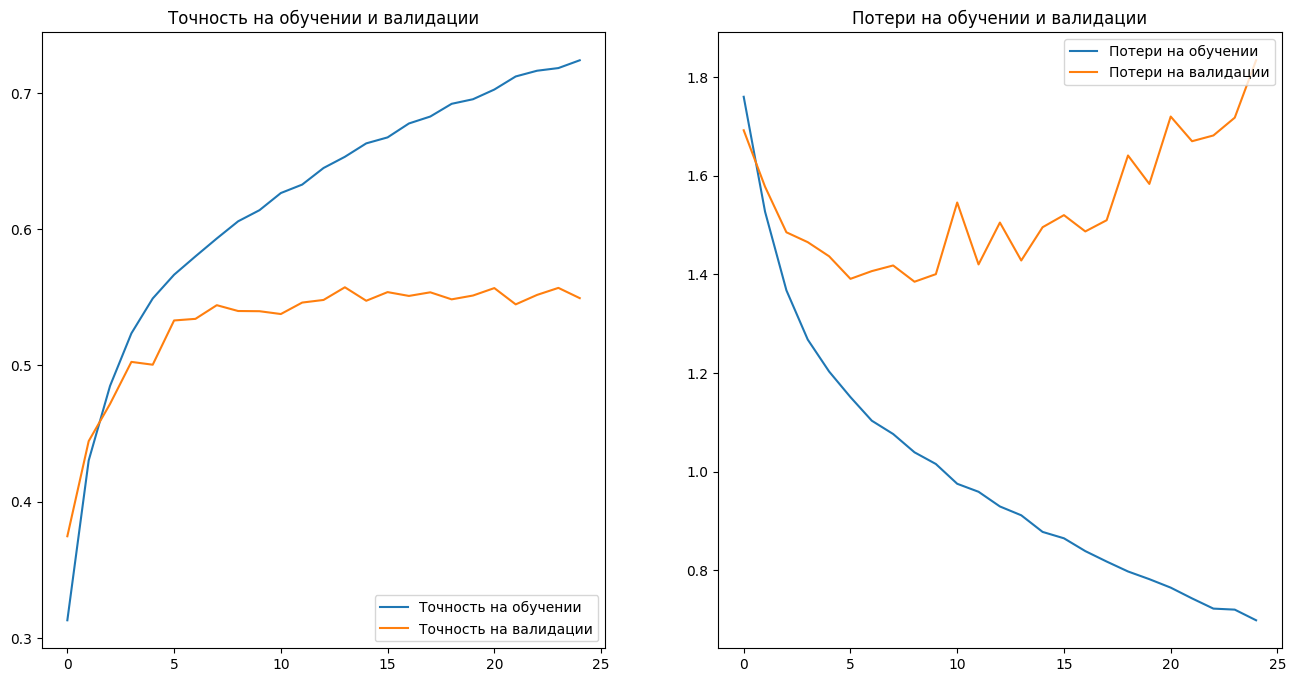

In [ ]:
# Построение графиков
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точность на обучении')
plt.plot(epochs_range, val_acc, label='Точность на валидации')
plt.legend(loc='lower right')
plt.title('Точность на обучении и валидации')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Потери на обучении')
plt.plot(epochs_range, val_loss, label='Потери на валидации')
plt.legend(loc='upper right')
plt.title('Потери на обучении и валидации')
plt.savefig('training_results.png')
plt.show()

128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5221 - loss: 2.0986
Точность на тестовых данных: 0.53
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


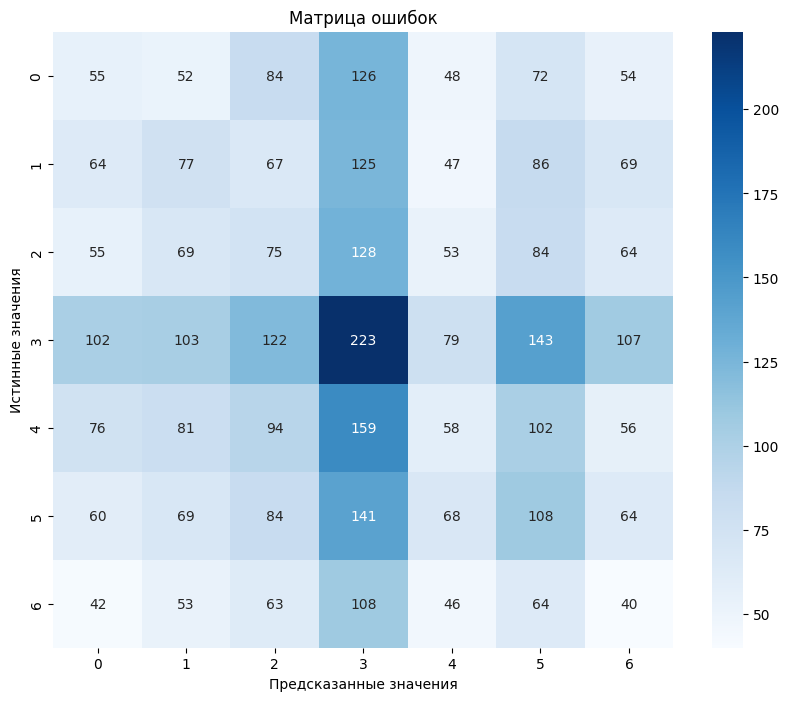

Классификационный отчет:
               precision    recall  f1-score   support

           0       0.12      0.11      0.12       491
           1       0.15      0.14      0.15       535
           2       0.13      0.14      0.13       528
           3       0.22      0.25      0.24       879
           4       0.15      0.09      0.11       626
           5       0.16      0.18      0.17       594
           6       0.09      0.10      0.09       416

    accuracy                           0.16      4069
   macro avg       0.15      0.15      0.14      4069
weighted avg       0.15      0.16      0.15      4069



In [ ]:
# Оценка на тестовой выборке
test_loss, test_acc = model.evaluate(test_generator)
print(f"Точность на тестовых данных: {test_acc:.2f}")

# Предсказания и матрица ошибок
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.savefig('confusion_matrix.png')
plt.show()

# Классификационный отчет
print("Классификационный отчет:\n", classification_report(y_true, y_pred))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/My Drive/Study/over_fit_model.keras')

In [ ]:
from tensorflow.keras.models import load_model
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
modelhaha = load_model('/content/drive/My Drive/Study/emotion_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


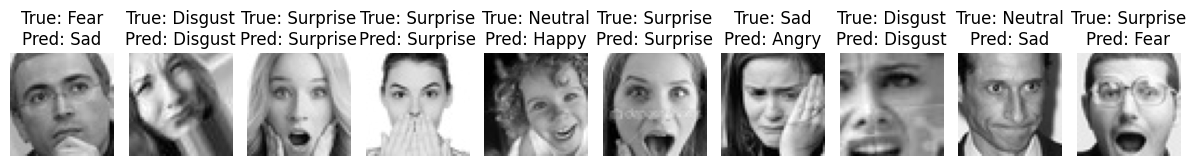

In [ ]:
# Получить один батч из тестовых данных
test_images, test_labels = next(test_generator)

# Предсказания
predictions = modelhaha.predict(test_images)

# Преобразование индексов в метки классов
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Отображение изображений с предсказаниями
class_names = list(test_generator.class_indices.keys())

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i in range(10):  # Вывод первых 5 изображений
    plt.subplot(1, 10, i + 1)
    plt.imshow(test_images[i].squeeze(), cmap='gray')
    plt.title(f"True: {class_names[true_classes[i]]}\nPred: {class_names[predicted_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Гиперпараметры
EPOCHS_2 = 5
BATCH_SIZE = 32

# Архитектура модели
model_2 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Обучение
history_2 = model_2.fit(
    train_generator,
    epochs=EPOCHS_2,
    validation_data=val_generator,
    verbose=1  # Логи по эпохам и итерациям
)

Epoch 1/5
847/847 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.2626 - loss: 1.8348 - val_accuracy: 0.4038 - val_loss: 1.6630
Epoch 2/5
847/847 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.4348 - loss: 1.4949 - val_accuracy: 0.4636 - val_loss: 1.5176
Epoch 3/5
847/847 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.4993 - loss: 1.3217 - val_accuracy: 0.4970 - val_loss: 1.4517
Epoch 4/5
847/847 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.5302 - loss: 1.2374 - val_accuracy: 0.5070 - val_loss: 1.4600
Epoch 5/5
847/847 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.5603 - loss: 1.1778 - val_accuracy: 0.5231 - val_loss: 1.4467


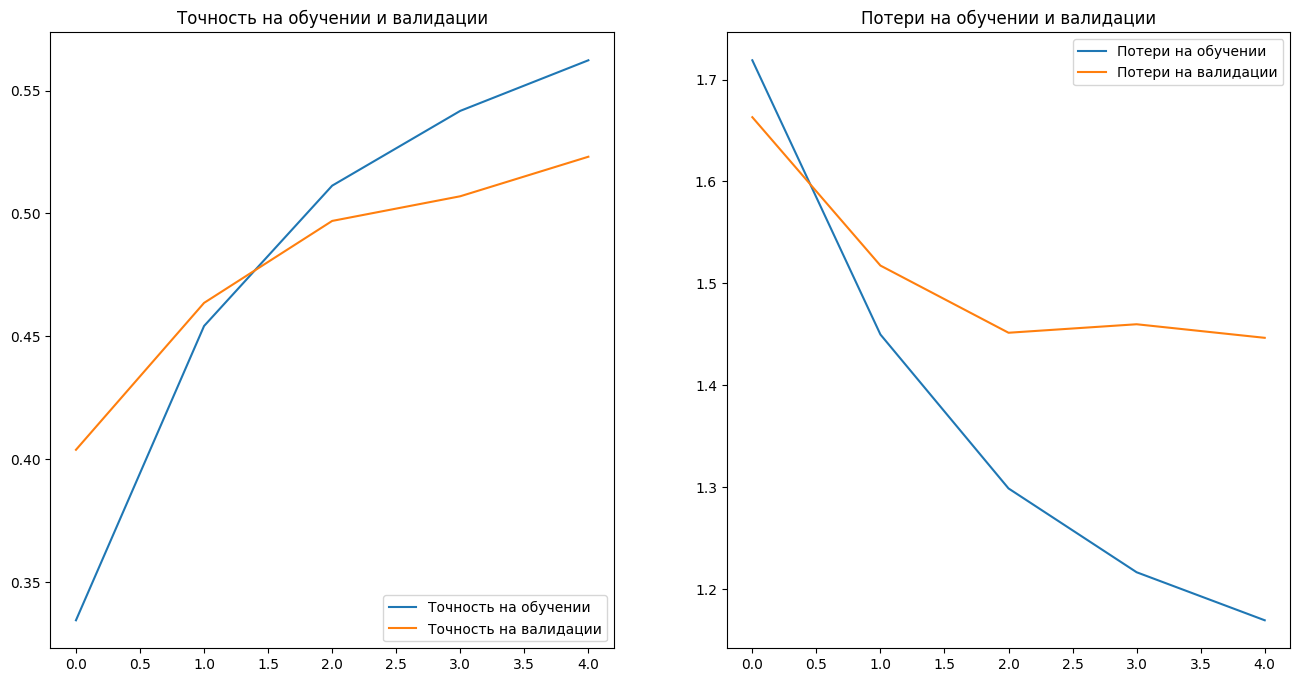

In [ ]:
# Построение графиков
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs_range = range(EPOCHS_2)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точность на обучении')
plt.plot(epochs_range, val_acc, label='Точность на валидации')
plt.legend(loc='lower right')
plt.title('Точность на обучении и валидации')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Потери на обучении')
plt.plot(epochs_range, val_loss, label='Потери на валидации')
plt.legend(loc='upper right')
plt.title('Потери на обучении и валидации')
plt.savefig('training_results.png')
plt.show()

128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.4920 - loss: 1.4075
Точность на тестовых данных: 0.50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


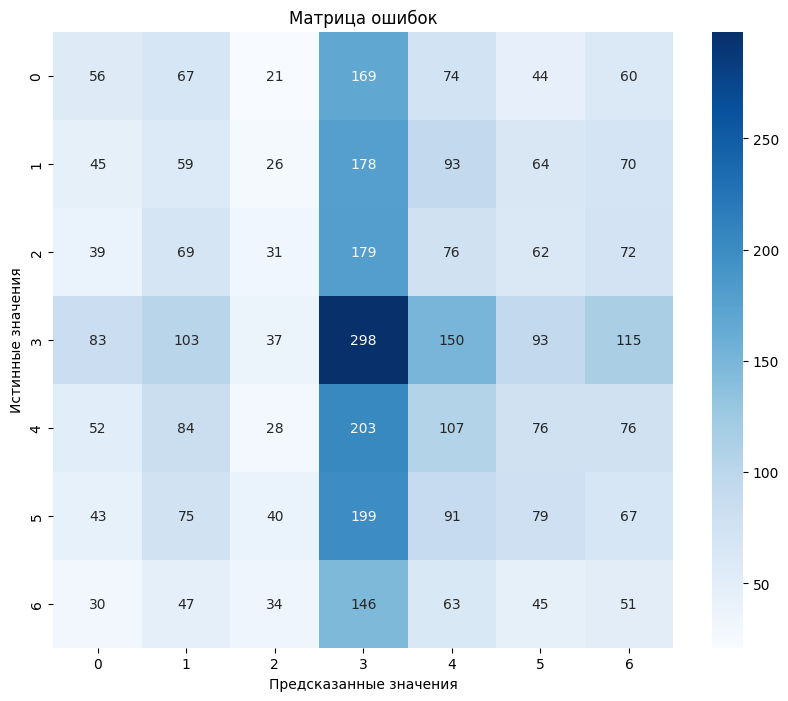

Классификационный отчет:
               precision    recall  f1-score   support

           0       0.16      0.11      0.13       491
           1       0.12      0.11      0.11       535
           2       0.14      0.06      0.08       528
           3       0.22      0.34      0.26       879
           4       0.16      0.17      0.17       626
           5       0.17      0.13      0.15       594
           6       0.10      0.12      0.11       416

    accuracy                           0.17      4069
   macro avg       0.15      0.15      0.15      4069
weighted avg       0.16      0.17      0.16      4069



In [ ]:
# Оценка на тестовой выборке
test_loss, test_acc = model_2.evaluate(test_generator)
print(f"Точность на тестовых данных: {test_acc:.2f}")

# Предсказания и матрица ошибок
y_true = test_generator.classes
y_pred = np.argmax(model_2.predict(test_generator), axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.savefig('confusion_matrix.png')
plt.show()

# Классификационный отчет
print("Классификационный отчет:\n", classification_report(y_true, y_pred))

In [ ]:
model_2.save('/content/drive/My Drive/Study/final_model.keras')

In [ ]:
final_model = load_model('/content/drive/My Drive/Study/final_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


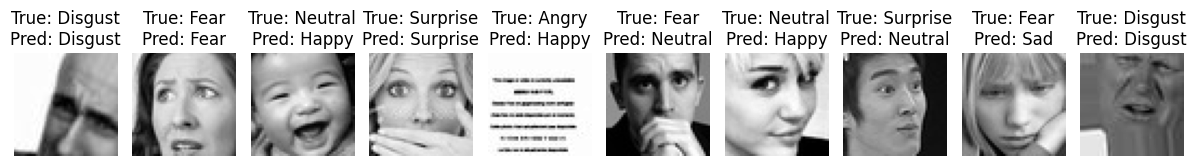

In [ ]:
# Получить один батч из тестовых данных
test_images, test_labels = next(test_generator)

# Предсказания
predictions = final_model.predict(test_images)

# Преобразование индексов в метки классов
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Отображение изображений с предсказаниями
class_names = list(test_generator.class_indices.keys())

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i in range(10):  # Вывод первых 5 изображений
    plt.subplot(1, 10, i + 1)
    plt.imshow(test_images[i].squeeze(), cmap='gray')
    plt.title(f"True: {class_names[true_classes[i]]}\nPred: {class_names[predicted_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()